##Context
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly $327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching $400 billion dollars annually.

 ##Research question:
Explore some of the following research questions:

- Can we provide accurate predictions of whether an individual has diabetes?
- What risk factors are most predictive of diabetes risk?
- Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?


##Important risk factors for diabetes :**
( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )

**About Columns :**
Diabetes_binary : you have diabetes (0,1)

HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

CholCheck : Cholesterol check within past five years (0,1)

BMI : Body Mass Index (BMI)

Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

Stroke : (Ever told) you had a stroke. (0,1)

HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

Fruits : Consume Fruit 1 or more times per day (0,1)

Veggies : Consume Vegetables 1 or more times per day (0,1)

HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

GenHlth : Would you say that in general your health is: rate (1 ~ 5)

MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)

Sex : Indicate sex of respondent (0,1) (Female or Male)

Age : Fourteen-level age category (1 ~ 14)

Education : What is the highest grade or year of school you completed? (1 ~ 6)

Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import sys

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

#import os
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/MyDrive/ColabNotebooks/')


import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config


# Loading the dataset
Dataset used in this EDA is from UC Irvine Machine Learning Repository which can be accessed from this link: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [2]:

# Load the dataset
df = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## EDA

In [ ]:
import missingno as msno

# Visualize missing values using missingno
msno.matrix(df)
plt.savefig('images/missing.png')
plt.show()

In [4]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
df.duplicated().sum()

24206

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
# prompt: check if data frame df is balanced or not based on the column Diabetes_binary

# Check class distribution for 'Diabetes_binary'
diabetes_counts = df['Diabetes_binary'].value_counts()
print(diabetes_counts)

# Calculate the percentage of each class
diabetes_percentages = diabetes_counts / len(df) * 100
print(diabetes_percentages)

# Determine if the dataset is balanced based on a threshold (e.g., 70%)
is_balanced = all(percentage > 30 for percentage in diabetes_percentages)

if is_balanced:
  print("The dataset is considered balanced.")
else:
  print("The dataset is imbalanced.")


Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64
Diabetes_binary
0.0    84.705457
1.0    15.294543
Name: count, dtype: float64
The dataset is imbalanced.


### Summary of Data Analysis


*   Data is cleaned, no null values, correct data types.
*   Dataset seems imbalanced and needs to be balanced b
*   There were around 24K duplicate rows and it has been removed



FileNotFoundError: [Errno 2] No such file or directory: '/Users/sanjayhegde/Documents/SH-AI-Files/images/univariate_analysis.png'

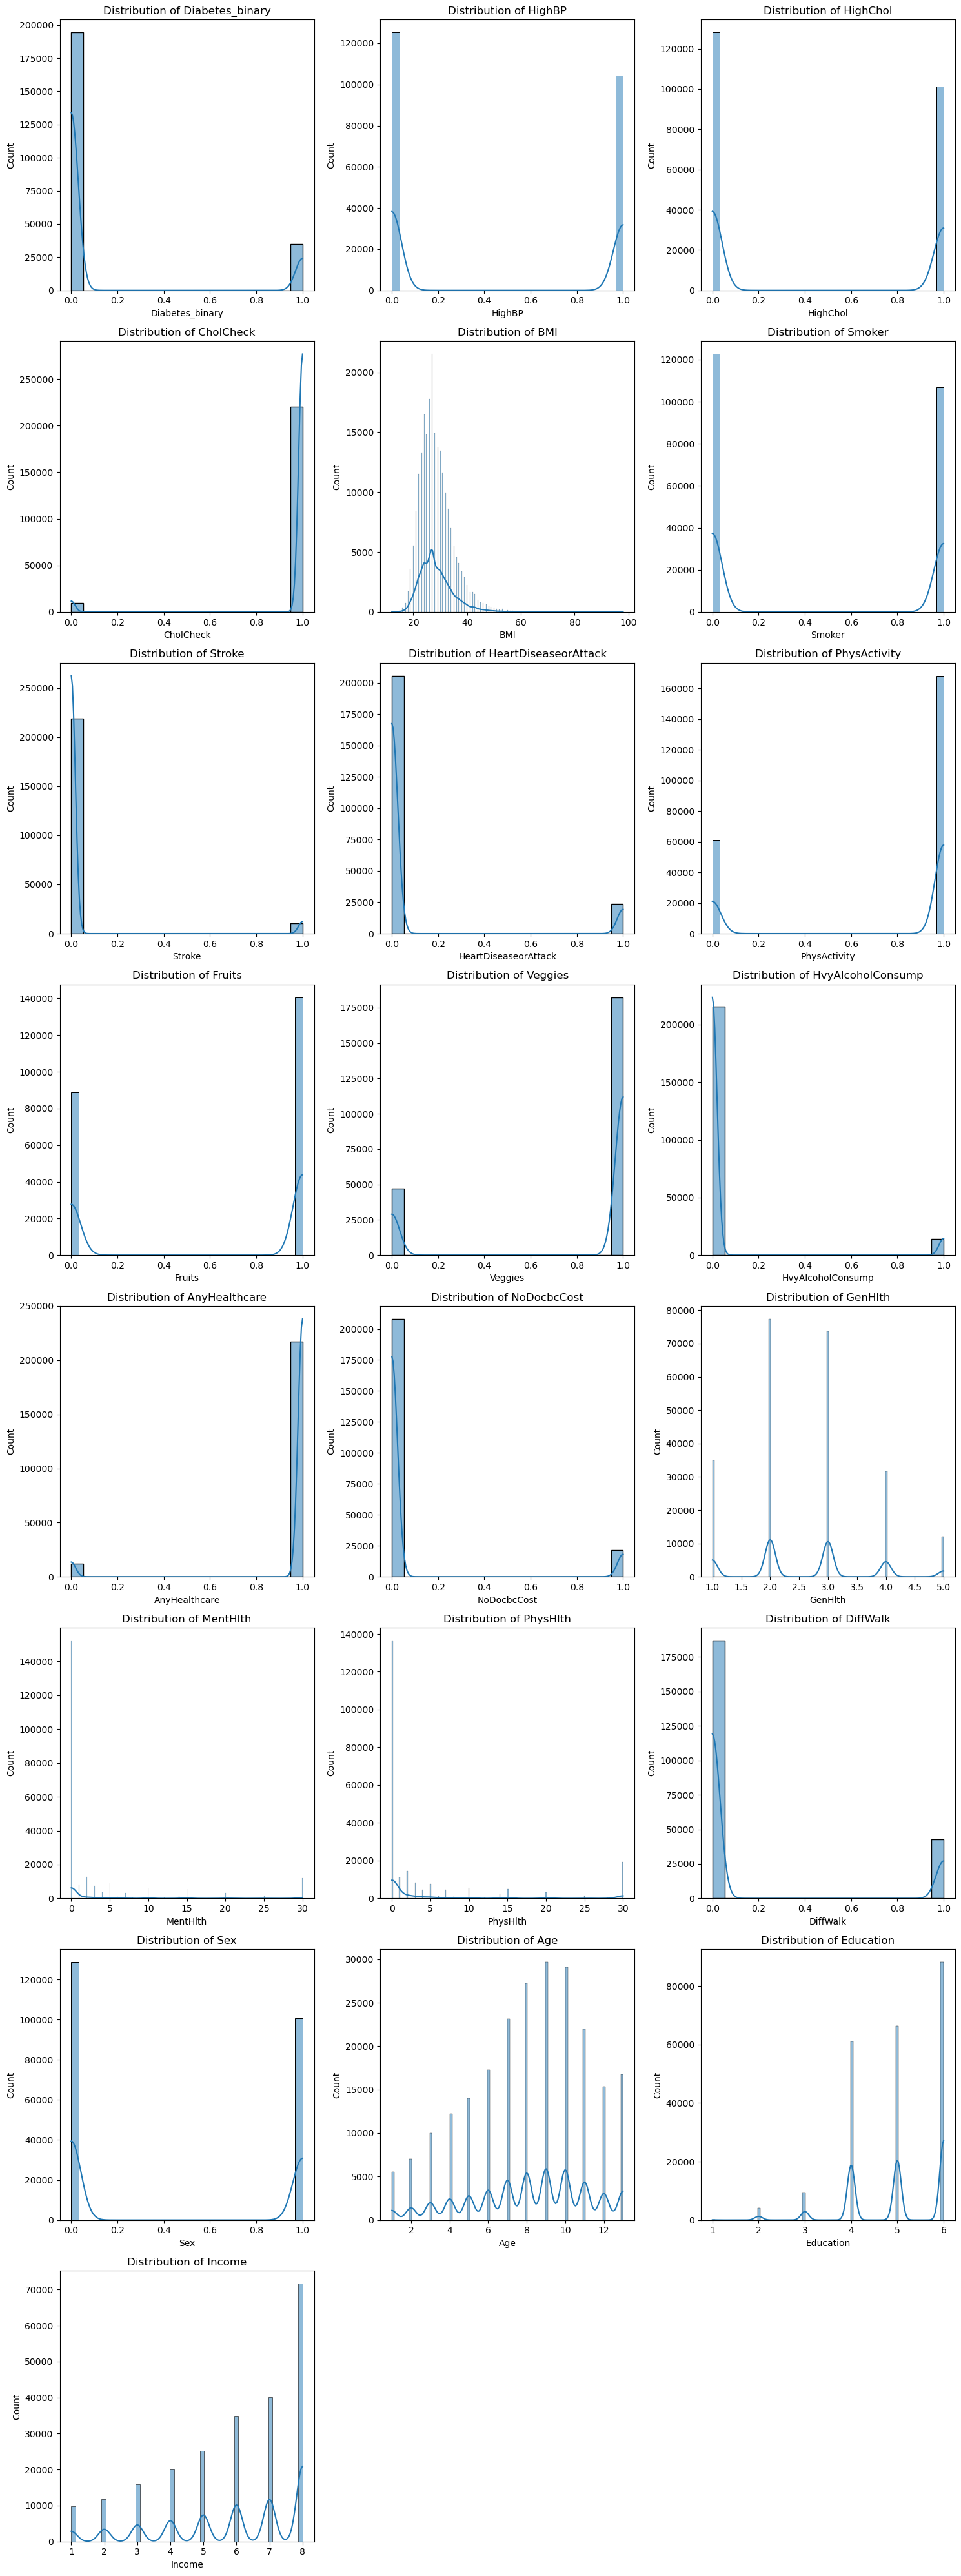

In [9]:
# prompt: Univariate analysis on dataframe df and print the graphs using subplots

# Univariate analysis with subplots
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows for subplots

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(df.columns):
    if i < num_cols:  # Check to avoid accessing out-of-bounds axes
      ax = axes[i]
      if df[col].dtype == 'object':  # Categorical column
          sns.countplot(x=col, data=df, ax=ax)
      else:  # Numerical column
          sns.histplot(df[col], kde=True, ax=ax)
      ax.set_title(f"Distribution of {col}")

# Remove any unused subplots
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('images/univariate_analysis.png')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sanjayhegde/Documents/SH-AI-Files/images/bivariage_analysis.png'

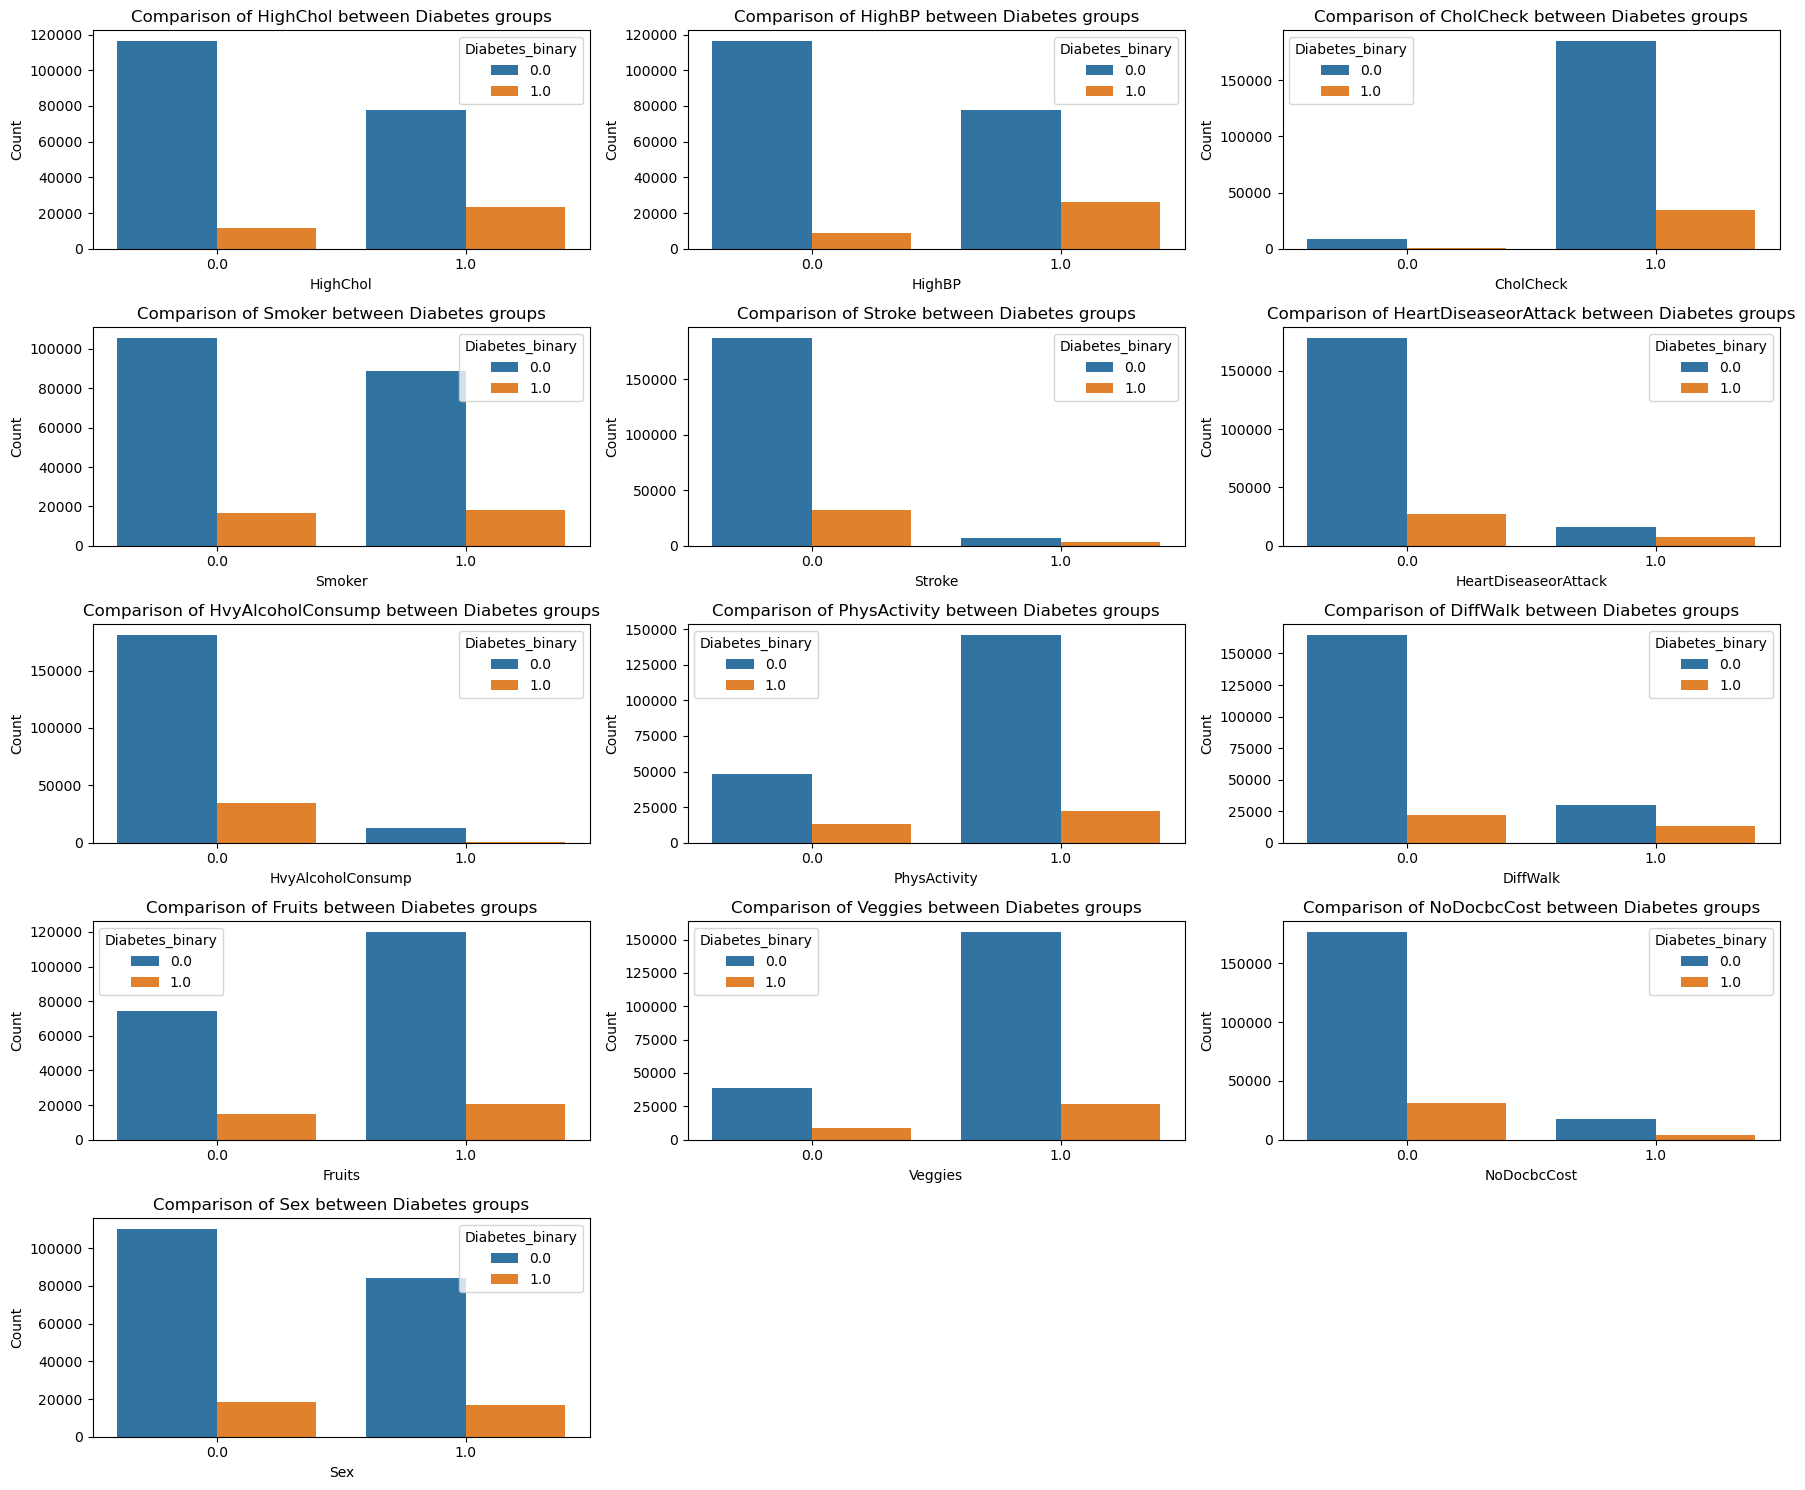

In [10]:
# prompt: visually compare data between no-diabetes and diabetics with columns HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk' and plot them

# Select relevant columns for comparison
cols_to_compare = ['HighChol', 'HighBP', 'CholCheck', 'Smoker', 'Stroke' , 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'PhysActivity','DiffWalk', 'Fruits', 'Veggies', 'NoDocbcCost', 'Sex'
]

# Create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_compare):
    sns.countplot(x=col, hue='Diabetes_binary', data=df, ax=axes[i])
    axes[i].set_title(f'Comparison of {col} between Diabetes groups')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])


plt.tight_layout()
plt.savefig('images/bivariate_analysis.png')
plt.show()


Summay of Data

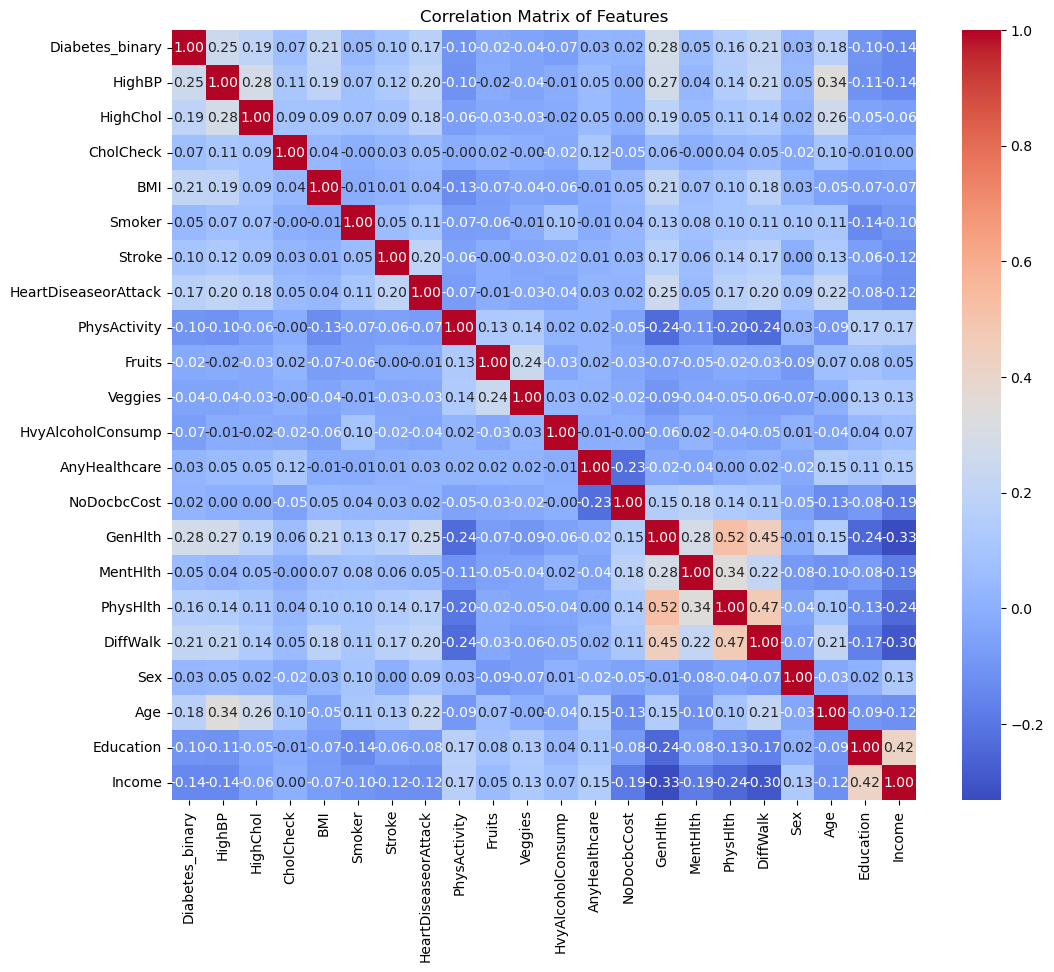

In [11]:
# prompt: generate correlation matrix

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('images/correlation_matrix.png')
plt.show()


## Symmary of Correlation Analysis


In [12]:
# prompt: generate code for feature selection and select top 10 features

from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Apply SelectKBest with ANOVA F-value for feature selection
selector = SelectKBest(score_func=f_classif, k=10) # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices].tolist()

print("Selected Features:", selected_feature_names)

# Create a new DataFrame with the selected features
X_selected = pd.DataFrame(X_new, columns=selected_feature_names)


Selected Features: ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


In [13]:
# prompt: balance the imbalanced dataframe df

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Create a balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=selected_feature_names)
df_balanced['Diabetes_binary'] = y_resampled

# Check the class distribution in the balanced dataset
print(df_balanced['Diabetes_binary'].value_counts())


Diabetes_binary
0.0    194377
1.0    194377
Name: count, dtype: int64


In [14]:
# prompt: develop code for dummy classifier on df_balanced dataframe and print model name, train accuracy, test accuracy, train time, precision, recall in a table format

from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score
import time
import pandas as pd

# Assuming df_balanced is already defined as in the previous code
X = df_balanced.drop('Diabetes_binary', axis=1)
y = df_balanced['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DummyClassifier(strategy="most_frequent") # Example using most_frequent strategy

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

train_time = end_time - start_time
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

data = {'Model': ['Dummy Classifier'],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Train Time': [train_time],
        'Precision': [precision],
        'Recall': [recall]}
results_df = pd.DataFrame(data)
results_df


,Model,Train Accuracy,Test Accuracy,Train Time,Precision,Recall
0,Dummy Classifier,0.500175,0.499299,0.010765,0.499299,1.0


In [15]:
# prompt: develop code for logistic regression, KNN, decision tree, gradient boost and random forest on df_balanced dataframe and print model name, train accuracy, test accuracy, train time, precision, recall in a table format

# Assuming df_balanced, X_train, X_test, y_train, y_test are already defined as in the previous code
from sklearn.ensemble import GradientBoostingClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(), #Import this
    'Random Forest': RandomForestClassifier()
}

results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)

    results.append([name, train_accuracy, test_accuracy, train_time, precision, recall])

results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train Time', 'Precision', 'Recall'])
results_df


,Model,Train Accuracy,Test Accuracy,Train Time,Precision,Recall
0,Logistic Regression,0.736633,0.735823,1.611867,0.723632,0.761881
1,KNN,0.868101,0.818729,0.169695,0.770388,0.907395
2,Decision Tree,0.971351,0.863680,0.818997,0.872676,0.851163
3,Gradient Boosting,0.852805,0.851912,23.917039,0.857468,0.843641
4,Random Forest,0.971341,0.891307,22.221312,0.913512,0.864120


In [17]:
# prompt: develop code for logistic regression, KNN, decision tree, gradient boost and random forest with hyper parameter tuning on df_balanced dataframe and print model name, train accuracy, test accuracy, train time, precision, recall in a table format

from sklearn.model_selection import GridSearchCV

# Assuming df_balanced, X_train, X_test, y_train, y_test are already defined

models = {
    'Logistic Regression': (LogisticRegression(),
                            {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'KNN': (KNeighborsClassifier(),
            {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(),
                      {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),
    'Gradient Boosting': (GradientBoostingClassifier(),
                          {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}),
    'Random Forest': (RandomForestClassifier(),
                      {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]})
}

results = []
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    

    results.append([name, train_accuracy, test_accuracy, train_time, precision, recall, best_params])

results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train Time', 'Precision', 'Recall', 'Best Parameters'])
results_df


,Model,Train Accuracy,Test Accuracy,Train Time,Precision,Recall,Best Parameters
0,Logistic Regression,0.736633,0.735823,19.083284,0.723632,0.761881,"{'C': 1, 'penalty': 'l2'}"
1,KNN,0.969229,0.844002,73.374831,0.811270,0.896010,"{'n_neighbors': 3, 'weights': 'distance'}"
2,Decision Tree,0.951193,0.867101,26.319885,0.886918,0.841065,"{'max_depth': None, 'min_samples_split': 5}"
3,Gradient Boosting,0.899078,0.894587,995.525085,0.952992,0.829809,"{'learning_rate': 1, 'n_estimators': 200}"
4,Random Forest,0.971351,0.891551,801.483895,0.913535,0.864635,"{'max_depth': None, 'n_estimators': 200}"
